In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd -q ..

In [15]:
import lcpfn
import torch
import numpy as np
from matplotlib import pyplot as plt

## Load trained LC-PFN model

In [4]:
model = lcpfn.LCPFN()

## Generate a learning curve from the prior

(0.0, 1.0)

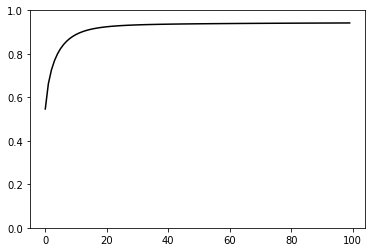

In [14]:
prior = lcpfn.sample_from_prior(np.random)
curve, _ = prior()
plt.plot(curve, "black")
plt.ylim(0, 1)

## Extrapolate the learning curve with a cutoff of 10% 

In [40]:
# construct

x = torch.arange(1, 101).unsqueeze(1)
y = torch.from_numpy(curve).float().unsqueeze(1)
cutoff = 10

In [37]:
predictions = model.predict_quantiles(
    x_train=x[:cutoff], y_train=y[:cutoff], x_test=x[cutoff:], qs=[0.05, 0.5, 0.95]
)

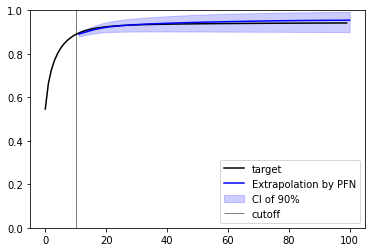

In [60]:
# plot data
plt.plot(curve, "black", label="target")

# plot extrapolation
plt.plot(x[cutoff:], predictions[:, 1], "blue", label="Extrapolation by PFN")
plt.fill_between(
    x[cutoff:].flatten(),
    predictions[:, 0],
    predictions[:, 2],
    color="blue",
    alpha=0.2,
    label="CI of 90%",
)

# plot cutoff
plt.vlines(cutoff, 0, 1, linewidth=0.5, color="k", label="cutoff")
plt.ylim(0, 1)
plt.legend(loc="lower right")